# Control Difuso

In [ ]:
# sistema de recomendaciones de propina
# basado en la calidad de la comida y el tiempo atencion
# ejemplo, si calidad comida = 10 y tiempo atencion = 30 min -> x% propina

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=83e456617e12c21310988c32e1d02007e03b9760a71f90820496ff5130af73a2
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
# importar librerias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# variables de entrada
calidad_comida = ctrl.Antecedent(np.arange(0,11,1),'calidad_comida')
tiempo_atencion = ctrl.Antecedent(np.arange(0,61,1),'tiempo_atencion')

# variables de salida
propina = ctrl.Consequent(np.arange(0,41,1),'propina')

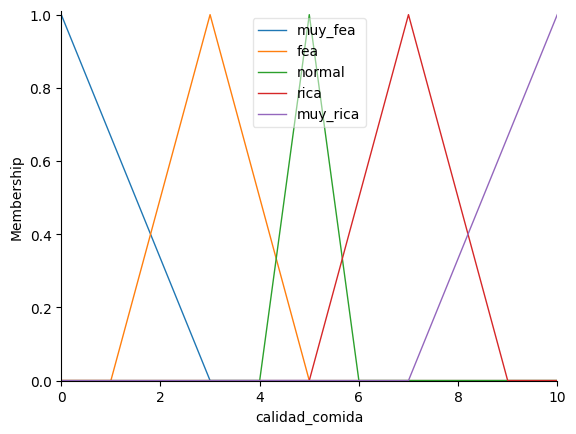

In [4]:
## Funciones de Membresia

## calidad comida
calidad_comida['muy_fea']=fuzz.trimf(calidad_comida.universe,[0,0,3])
calidad_comida['fea'] = fuzz.trimf(calidad_comida.universe,[1,3,5])
calidad_comida['normal'] = fuzz.trimf(calidad_comida.universe,[4,5,6])
calidad_comida['rica'] = fuzz.trimf(calidad_comida.universe,[5,7,9])
calidad_comida['muy_rica'] = fuzz.trimf(calidad_comida.universe,[7,10,10])

calidad_comida.view()

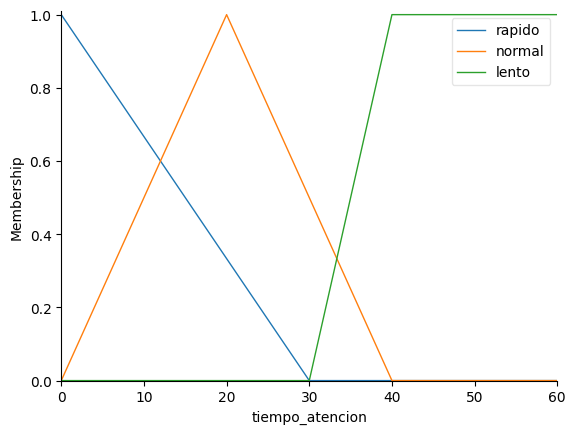

In [7]:
# tiempo atencion - rapido - normal - lento

tiempo_atencion['rapido'] = fuzz.trimf(tiempo_atencion.universe,[0,0,30])
tiempo_atencion['normal'] = fuzz.trimf(tiempo_atencion.universe,[0,20,40])
tiempo_atencion['lento'] = fuzz.trapmf(tiempo_atencion.universe,[30,40,60,60])

tiempo_atencion.view()


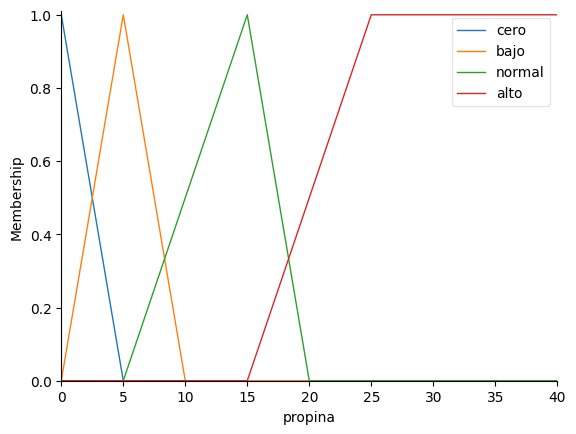

In [11]:
## propina alto-normal-bajo-cero

propina['cero'] = fuzz.trimf(propina.universe,[0,0,5])
propina['bajo'] = fuzz.trimf(propina.universe,[0,5,10])
propina['normal'] = fuzz.trimf(propina.universe,[5,15,20])
propina['alto'] = fuzz.trapmf(propina.universe,[15,25,40,40])

propina.view()

In [13]:
# crear reglas difusas

regla11 = ctrl.Rule(tiempo_atencion['lento'] & calidad_comida['muy_fea'],propina['cero'])
regla12 = ctrl.Rule(tiempo_atencion['lento']&calidad_comida['fea'],propina['cero'])
regla13 = ctrl.Rule(tiempo_atencion['lento']&calidad_comida['normal'],propina['cero'])
regla14 = ctrl.Rule(tiempo_atencion['lento']&calidad_comida['rica'],propina['bajo'])
regla15 = ctrl.Rule(tiempo_atencion['lento']&calidad_comida['muy_rica'],propina['normal'])

regla21 = ctrl.Rule(tiempo_atencion['normal']&calidad_comida['muy_fea'],propina['cero'])
regla22 = ctrl.Rule(tiempo_atencion['normal']&calidad_comida['fea'],propina['cero'])
regla23 = ctrl.Rule(tiempo_atencion['normal']&calidad_comida['normal'],propina['bajo'])
regla24 = ctrl.Rule(tiempo_atencion['normal']&calidad_comida['rica'],propina['normal'])
regla25 = ctrl.Rule(tiempo_atencion['normal']&calidad_comida['muy_rica'],propina['normal'])

regla31 = ctrl.Rule(tiempo_atencion['rapido']&calidad_comida['muy_fea'],propina['cero'])
regla32 = ctrl.Rule(tiempo_atencion['rapido']&calidad_comida['fea'],propina['cero'])
regla33 = ctrl.Rule(tiempo_atencion['rapido']&calidad_comida['normal'],propina['normal'])
regla34 = ctrl.Rule(tiempo_atencion['rapido']&calidad_comida['rica'],propina['alto'])
regla35 = ctrl.Rule(tiempo_atencion['rapido']&calidad_comida['muy_rica'],propina['alto'])



In [15]:
sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,
        regla15,
        regla21,
        regla22,
        regla23,
        regla24,
        regla25,
        regla31,
        regla32,
        regla33,
        regla34,
        regla35
    ]
)

controlador = ctrl.ControlSystemSimulation(sistema_control)

In [21]:
# si la calidad de comida fue de 7 estrellas y el tiempo de atencion fue de 10 min
# cual es la propina recomendada??

controlador.input['calidad_comida']=7
controlador.input['tiempo_atencion']=10

controlador.compute()

# obtener resultado

propina_calculada = controlador.output['propina']
print(f"la propina recomendada es: {propina_calculada}%")

la propina recomendada es: 24.87353643105409%
